## Discussion Related To Outliers And Impact on Machine Learning

# Which all algorithm is not SENSITIVE by outliers
1. Naive bayes--- Not sensitive by outliers
2.SVM -- not sensitive
3.KNN---  Not Sensitive
4.KMeans----- Sensitive
5.linear regression--- sensitive
6.logistic regression--- sensitive
7.PCA--- Sensitive
8.Heirachial--- Sensitive
9.Neural Network--- Sensitive
10.Decision Tree regression and classifier---- Not sensitive
11.Ensemble Technique(GB,XGB,RF)--- Not sensitive


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns


In [2]:
import matplotlib.pyplot as plt


In [3]:
df=pd.read_csv('titanic.csv')

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

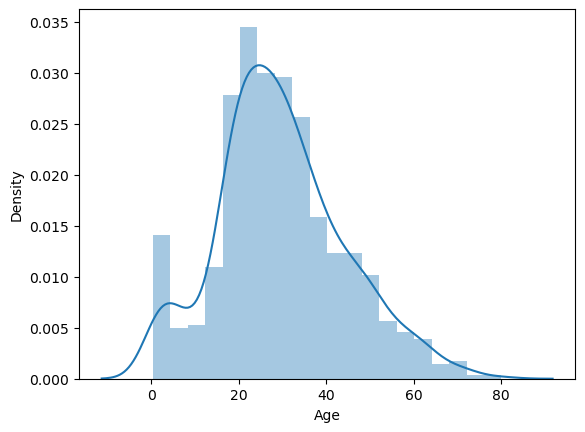

In [6]:
sns.distplot(df['Age'].dropna())

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

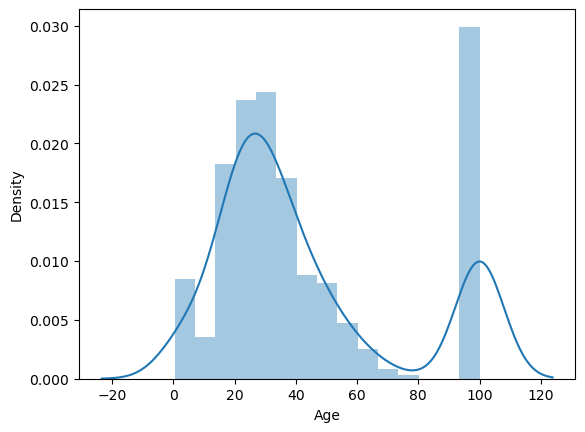

In [7]:
sns.distplot(df['Age'].fillna(100))

Text(0, 0.5, 'No of passengers')

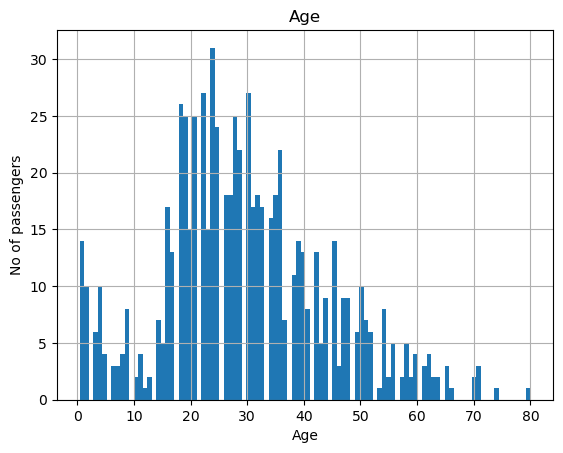

In [8]:
figure= df.Age.hist(bins=100)
figure.set_title('Age')
figure.set_xlabel('Age')
figure.set_ylabel('No of passengers')

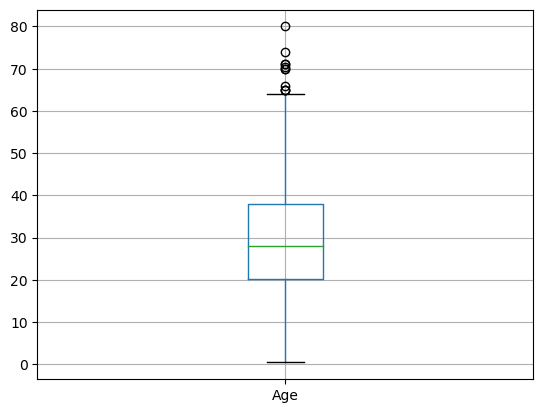

In [9]:
figure=df.boxplot(column='Age')

In [10]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [11]:
### Assuming age follows a  Gussian Distributionm we calculate boundaries to differentiate outliers

In [12]:
upper_boundaries=df['Age'].mean()+3*df['Age'].std()
lower_boundaries=df['Age'].mean()-3*df['Age'].std()
print(lower_boundaries),print(upper_boundaries),print(df['Age'].mean())

-13.88037434994331
73.27860964406095
29.69911764705882


(None, None, None)

In [13]:
### lets compute Interquantile range to calculate the boundaries
IQR= df['Age'].quantile(0.75)-df['Age'].quantile(0.25)

In [14]:
IQR

17.875

In [15]:
lower_bridge=df['Age'].quantile(0.25)-(IQR*1.5)
upper_bridge=df['Age'].quantile(0.75)+(IQR*1.5)

In [16]:
print(lower_bridge),print(upper_bridge)

-6.6875
64.8125


(None, None)

In [17]:
## Extreme outliers
lower_bridge=df['Age'].quantile(0.25)-(IQR*3)
upper_bridge=df['Age'].quantile(0.75)+(IQR*3)

In [18]:
print(lower_bridge),print(upper_bridge)

-33.5
91.625


(None, None)

## Feature is skewed

Text(0, 0.5, 'No of passengers')

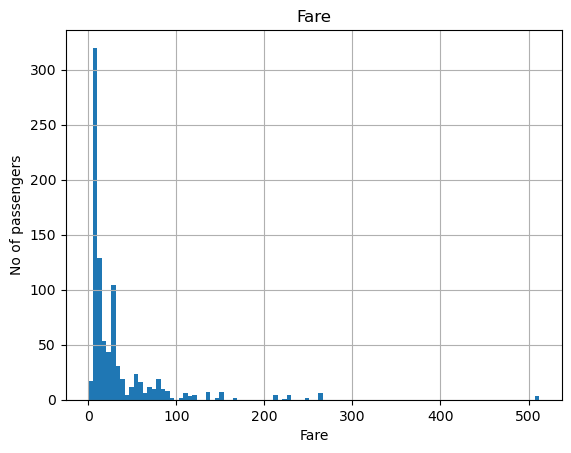

In [19]:
figure=df.Fare.hist(bins=100)
figure.set_title('Fare')
figure.set_xlabel('Fare')
figure.set_ylabel("No of passengers")

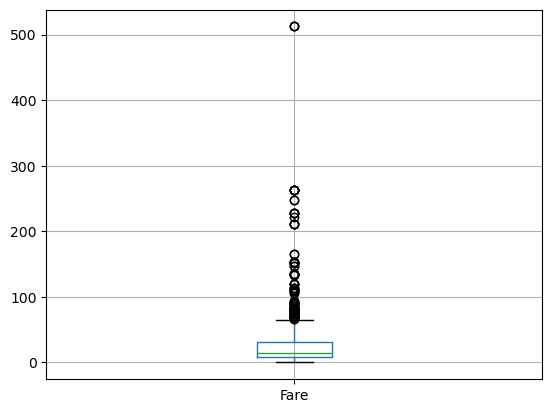

In [20]:
figure= df.boxplot(column='Fare')

In [21]:
df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [22]:
IQR= df.Fare.quantile(0.75)-df.Fare.quantile(0.25)

In [23]:
IQR

23.0896

In [24]:
lower_bridge=df['Fare'].quantile(0.25)-(IQR*1.5)
upper_bridge=df['Fare'].quantile(0.75)+(IQR*1.5)
print(lower_bridge), print(upper_bridge)

-26.724
65.6344


(None, None)

In [25]:
#### Extreme outliers
lower_bridge=df['Fare'].quantile(0.25)-(IQR*3)
upper_bridge=df['Fare'].quantile(0.75)+(IQR*3)
print(lower_bridge), print(upper_bridge)

-61.358399999999996
100.2688


(None, None)

## Removing Outliers

In [26]:
data=df.copy()

In [27]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [28]:
data.loc[data['Age']>=73,'Age']=73

In [29]:
data.head(100)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,0,3,"Shorney, Mr. Charles Joseph",male,NaN,0,0,374910,8.0500,NaN,S
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
97,98,1,1,"Greenfield, Mr. William Bertram",male,23.0,0,1,PC 17759,63.3583,D10 D12,C
98,99,1,2,"Doling, Mrs. John T (Ada Julia Bone)",female,34.0,0,1,231919,23.0000,NaN,S


In [34]:
data.loc[df['Fare']>=100,'Fare']=100

Text(24.000000000000007, 0.5, 'No of passenger')

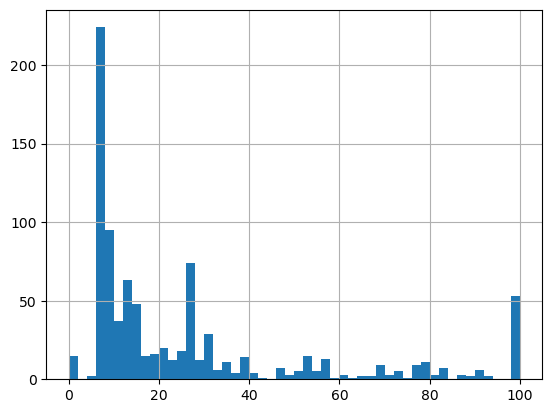

In [36]:
igure=data.Fare.hist(bins=50)
figure.set_title('Fare')
figure.set_xlabel('Fare')
figure.set_ylabel('No of passenger')

In [48]:
X= data[['Age','Fare']].fillna(0)
y=data['Survived']

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3)

In [51]:
from sklearn.linear_model import LogisticRegression

In [52]:
model= LogisticRegression()

In [53]:
model.fit(X_train,y_train)

LogisticRegression()

In [55]:
y_pred=model.predict(X_test)

In [58]:
y_pred1=model.predict_proba(X_test)

In [59]:
from sklearn.metrics import accuracy_score,roc_auc_score

In [60]:
print("Accuracy_score: {}".format(accuracy_score(y_test,y_pred)))
print("roc_auc_score: {}".format(roc_auc_score(y_test,y_pred1[:,1])))

Accuracy_score: 0.6716417910447762
roc_auc_score: 0.6925595238095238
